# Загрузить и исследовать данные

In [44]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
new_users = pd.read_excel('users.xlsx')

purchases = pd.read_excel('purchases.xlsx')


In [45]:
purchases.info() 
purchases.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18232 entries, 0 to 18231
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     18232 non-null  object        
 1   event_dt    18232 non-null  datetime64[ns]
 2   revenue     18232 non-null  float64       
 3   ad_network  18232 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 569.9+ KB


,user_id,event_dt,revenue,ad_network
0,fb1b6f9ddc3ddd6d,2021-02-01 10:26:57,4.99,FB
1,fb1b6f9ddc3ddd6d,2021-02-06 22:15:05,4.99,FB
2,fb1b6f9ddc3ddd6d,2021-02-19 04:36:59,4.99,FB
3,fb1b6f9ddc3ddd6d,2021-02-26 21:14:23,4.99,FB
4,fb1b6f9ddc3ddd6d,2021-03-04 21:03:59,4.99,FB


Данные о покупках включают в себя:

user_id - уникальный идентификатор пользователя; 

event_dt - дату совершения покупки;

revenue - сумму покупки (в долларах);

ad_network - название рекламной сети, с помощью которой был привлечен пользователь.


In [50]:
new_users.info() 
new_users.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166447 entries, 0 to 166446
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     166447 non-null  object        
 1   dt          166447 non-null  datetime64[ns]
 2   ad_network  166447 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 3.8+ MB


,user_id,dt,ad_network
0,74793686a6268281,2021-02-01,FB
1,6986c3d2188caf4b,2021-02-01,FB
2,d9a79c634cc6df36,2021-02-01,FB
3,b3b0c361708b69a9,2021-02-01,FB
4,48ddcd54a6844b70,2021-02-01,FB


Данные о новых пользователях включают в себя:

user_id - уникальный идентификатор пользователя; 

dt - дату регистрации пользователя;

ad_network - название рекламной сети, с помощью которой был привлечен пользователь.


# Одновыборочный z-тест

Сотруник утверждает, что процент конверсии новых пользователей в покупателей составляет 3%. Необходимо проверить это утверждение с помощью z-теста для пропорций.

In [65]:
# задаем порог
value = 0.03

# готовим данные
buyers = purchases['user_id'].nunique()
total_users = new_users['user_id'].nunique()

print('Покупатели: {}, общее число пользователей: {}, конверсия: {}'.format(buyers, total_users, buyers / total_users))


Покупатели: 3399, общее число пользователей: 166447, конверсия: 0.02042091476566114


In [ ]:
Провести тест с уровнем значимости 0.05

In [77]:
from statsmodels.stats.proportion import proportions_ztest

alpha = 0.05

p_value = proportions_ztest(buyers, total_users, value = value)[1]
print('p-value: {:.5f}'.format(p_value))

# анализируем результат
if p_value < alpha:
    print('Отвергаем нулевую гипотезу: доля целевых наблюдений не равна заданному порогу.')
else:
    print('Не отвергаем нулевую гипотезу: доля целевых наблюдений равна заданному порогу.')


p-value: 0.00000
Отвергаем нулевую гипотезу: доля целевых наблюдений не равна заданному порогу.


Результат теста показывает, что реальный процент конверсии в покупателей (2%) статистически значимо отличается от предложенного коллегой (3%).

# Двухвыборочный z-тест

Проверить с помощью z-теста для пропорций, отличается ли процент конверсии новых пользователей в покупателей для рекламных источников FB и Instagroom.

In [84]:
# готовим данные
buyers_fb = purchases.query('ad_network == "FB"')['user_id'].nunique()
total_users_fb = new_users.query('ad_network == "FB"')['user_id'].nunique()

buyers_ig = purchases.query('ad_network == "Instagroom"')['user_id'].nunique()
total_users_ig = new_users.query('ad_network == "Instagroom"')['user_id'].nunique()

print('FB Покупатели: {}, общее число пользователей: {}, коневерсия: {}'.format(buyers_fb, total_users_fb, buyers_fb / total_users_fb))
print('Instagroom Покупатели: {}, общее число пользователей: {}, коневерсия: {}'.format (buyers_ig, total_users_ig, buyers_ig / total_users_ig))


FB Покупатели: 2281, общее число пользователей: 114297, коневерсия: 0.01995677926804728
Instagroom Покупатели: 1118, общее число пользователей: 52150, коневерсия: 0.021438159156279963


Провести тест с уровнем значимости 0.05

In [86]:
from statsmodels.stats.proportion import proportions_ztest

alpha = 0.05

p_value = proportions_ztest([buyers_fb, buyers_ig], [total_users_fb, total_users_ig])[1]
print('p-value: {:.5f}'.format(p_value))

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: доли целевых наблюдений в двух группах отличаются.')
else:
    print('Не отвергаем нулевую гипотезу: доли целевых наблюдений в обеих группах одина ковые.')


p-value: 0.04747
Отвергаем нулевую гипотезу: доли целевых наблюдений в двух группах отличаются.


# Одновыборочный t-тест

Протестировать равно ли среднее значение пользовательского чека пороговому значению.

C:\Users\majkl\AppData\Local\Temp\ipykernel_12532\3381861596.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(report, label = 'Средний чек')


Средний чек: 29.52
p-value: 0.00000
Отвергаем нулевую гипотезу: среднее не равно заданному порогу.


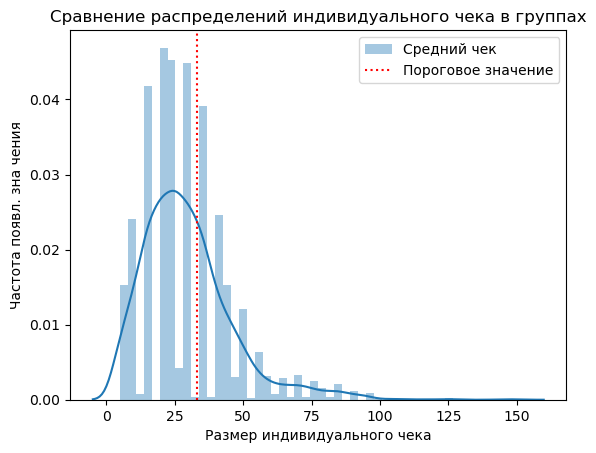

In [95]:
import scipy.stats as stats

# задаем порог
value = 33

# готовим данные
report = purchases.groupby('user_id').agg({'revenue': 'sum'})['revenue']

ax = sns.distplot(report, label = 'Средний чек')
ax.axvline(x = value, color = 'red', linestyle = ':', label = 'Пороговое значение') 
print('Средний чек: {:.2f}'.format(report.mean()))
plt.legend(), plt.xlabel('Размер индивидуального чека'), plt.ylabel('Частота появл. зна чения'), plt.title('Сравнение распределений индивидуального чека в группах')

# задаем уровень значимости
alpha = 0.05

#проводим тест
p_value = stats.ttest_1samp(report, popmean = value)[1] 
print('p-value: {:.5f}'.format(p_value))

# анализируем результат
if p_value < alpha:
    print('Отвергаем нулевую гипотезу: среднее не равно заданному порогу.')
else:
    print('Не отвергаем нулевую гипотезу: среднее равно заданному порогу.')


# Двухвыборочный t-тест

Протестировать различия среднего чека для пользователей, привлеченных из рекламных сетей FB и Instagroom.

C:\Users\majkl\AppData\Local\Temp\ipykernel_12532\956557478.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(current, label = adn)
C:\Users\majkl\AppData\Local\Temp\ipykernel_12532\956557478.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(current, label = adn)


Средний чек для FB: 28.64
Средний чек для Instagroom: 31.32
p-value: 0.00007
Отвергаем нулевую гипотезу: средние в двух группах не равны.


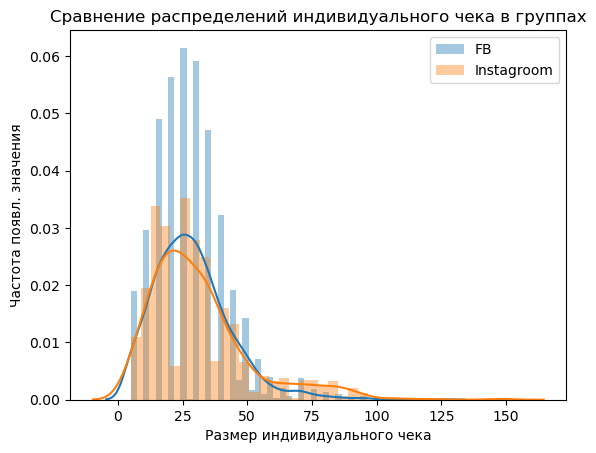

In [105]:
import scipy.stats as stats

# готовим данные
report = purchases.groupby('user_id').agg({'ad_network': 'first', 'revenue': 'sum'})
for adn in report['ad_network'].unique():
    current = report.query('ad_network == @adn')['revenue'] 
    sns.distplot(current, label = adn)
    print('Средний чек для {}: {:.2f}'.format(adn, current.mean()))
plt.legend(), plt.xlabel('Размер индивидуального чека'), plt.ylabel('Частота появл. значения'), plt.title('Сравнение распределений индивидуального чека в группах')

report_fb = report.query('ad_network == "FB"')['revenue']
report_ig = report.query('ad_network == "Instagroom"')['revenue']

# задаем уровень значимости
alpha = 0.05

#проводим тест
p_value = stats.ttest_ind(report_fb, report_ig, equal_var = False).pvalue 
print('p-value: {:.5f}'.format(p_value))

# анализируем результат
if p_value < alpha:
    print('Отвергаем нулевую гипотезу: средние в двух группах не равны.')
else:
    print('Не отвергаем нулевую гипотезу: средние в двух группах равны.')


Результаты теста показывают, что средние индивидуальные чеки для пользователей, привлеченных из разных каналов не равны - результаты Instagroom выше почти в полтора раза. 

Проверить наличие выбросов в данных

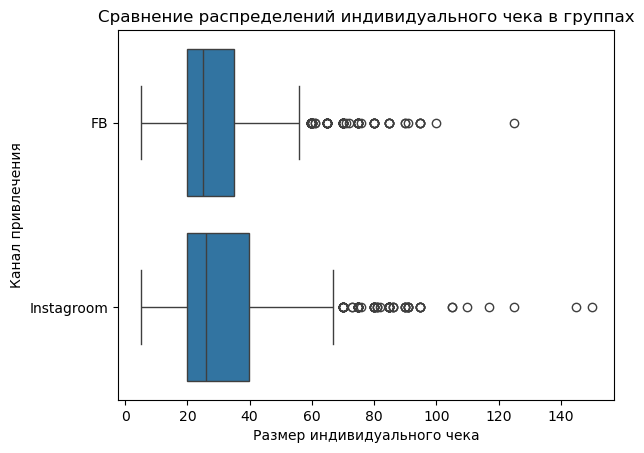

In [109]:
sns.boxplot(data = report, x = 'revenue', y = 'ad_network')
plt.xlabel('Размер индивидуального чека'), plt.ylabel('Канал привлечения'), plt.title( 'Сравнение распределений индивидуального чека в группах');


В обеих выборках есть выбросы. Выбросы способны сильно сместить средние значения. Необходимо очистить выбросы и сравнить результат

Средний чек для FB: 26.28
Средний чек для Instagroom: 27.91
p-value: 0.00000
Отвергаем нулевую гипотезу: средние в двух группах не равны.


C:\Users\majkl\AppData\Local\Temp\ipykernel_12532\3215286949.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(current, label = adn)
C:\Users\majkl\AppData\Local\Temp\ipykernel_12532\3215286949.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(current, label = adn)


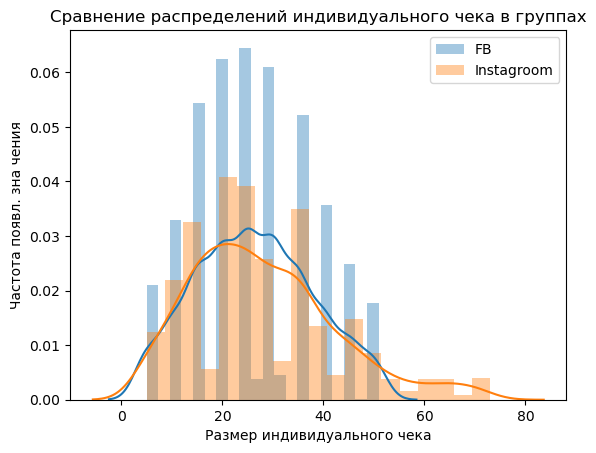

In [114]:
import scipy.stats as stats

# готовим данные
outliers_limit = 0.95

report = purchases.groupby('user_id').agg({'ad_network': 'first', 'revenue': 'sum'})
for adn in report['ad_network'].unique():
    current = report.query('ad_network == @adn')['revenue']
    current = current[current < current.quantile(outliers_limit)] # исключаем выбросы
    sns.distplot(current, label = adn)
    print('Средний чек для {}: {:.2f}'.format(adn, current.mean()))
plt.legend(), plt.xlabel('Размер индивидуального чека'), plt.ylabel('Частота появл. зна чения'), plt.title('Сравнение распределений индивидуального чека в группах')

report_fb = report.query('ad_network == "FB"')['revenue']
report_fb = report_fb[report_fb < report_fb.quantile(outliers_limit)] # исключаем выбро сы
report_ig = report.query('ad_network == "Instagroom"')['revenue']
report_fb = report_fb[report_fb < report_fb.quantile(outliers_limit)] # исключаем выбро сы

# задаем уровень значимости
alpha = 0.05

#проводим тест
p_value = stats.ttest_ind(report_fb, report_ig, equal_var = False).pvalue 
print('p-value: {:.5f}'.format(p_value))

# анализируем результат
if p_value < alpha:
    print('Отвергаем нулевую гипотезу: средние в двух группах не равны.')
else:
    print('Не отвергаем нулевую гипотезу: средние в двух группах равны.')



Хвосты распределений стали существенно короче, что привело к коррекции средних значений. Но на общий результат теста это не повлияло.

# Тест Манна-Уитни

In [ ]:
import scipy.stats as stats

# готовим данные
report_fb = report.query('ad_network == "FB"')['revenue']
report_ig = report.query('ad_network == "Instagroom"')['revenue']

# задаем уровень значимости
alpha = 0.05

#проводим тест
p_value = stats.mannwhitneyu(report_fb, report_ig, alternative = 'two-sided').pvalue print('p-value: {:.5f}'.format(p_value))

# анализируем результат
if p_value < alpha:
    print('Отвергаем нулевую гипотезу: данные двух выборок получены из разных генеральн ых совокупностей.')
else:
    print('Не отвергаем нулевую гипотезу: данные двух выборок получены из одной генерал ьной совокупности.')
